In [1]:
## Base imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#magic commands
%matplotlib  inline

In [104]:
# modelimports
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,  BaggingClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#model selectors
from sklearn.model_selection import train_test_split , RepeatedStratifiedKFold , cross_val_score , GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold , KFold ,train_test_split
#model preprocessors
from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler

#metrics importation
from sklearn.metrics import classification_report , accuracy_score , precision_score , f1_score

#imbalancing
from imblearn.over_sampling import SMOTE , SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#imputers
from sklearn.impute import KNNImputer

#all_estimators
from sklearn.utils import all_estimators

In [3]:
from dataprep.eda import create_report
matplotlib.rcParams['figure.figsize'] = (20 , 8)
sns.set_style('darkgrid')

In [4]:
pd.set_option('display.max_columns' , 600)

In [5]:
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')
ngn_names  = pd.read_csv('./data/NigerianStateNames.csv')
ss = pd.read_csv('./data/SampleSubmission.csv')

In [6]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [7]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


In [8]:
##visualizing shape

print(f"The shape of the train set is {train.shape}. \nThe shape of the test set is {test.shape}.")

The shape of the train set is (12079, 14). 
The shape of the test set is (1202, 13).


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


Aside the target column , we posses two features that are numerical which are `Age and No_Pol`

In [10]:
print(train.isna().sum())
print('*'*50)
print(test.isna().sum())

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64
**************************************************
ID                          0
Policy Start Date           0
Policy End Date             0
Gender                     41
Age                         0
First Transaction Date      0
No_Pol                      0
Car_Category              372
Subject_Car_Colour        697
Subject_Car_Make          248
LGA_Name                  656
State                     656
ProductName                 0
dtype: int64


In [11]:
print(train.isna().mean())
print("*"*50)
print(test.isna().mean())

ID                        0.000000
Policy Start Date         0.000000
Policy End Date           0.000000
Gender                    0.029721
Age                       0.000000
First Transaction Date    0.000000
No_Pol                    0.000000
Car_Category              0.309463
Subject_Car_Colour        0.576372
Subject_Car_Make          0.204984
LGA_Name                  0.536137
State                     0.537131
ProductName               0.000000
target                    0.000000
dtype: float64
**************************************************
ID                        0.000000
Policy Start Date         0.000000
Policy End Date           0.000000
Gender                    0.034110
Age                       0.000000
First Transaction Date    0.000000
No_Pol                    0.000000
Car_Category              0.309484
Subject_Car_Colour        0.579867
Subject_Car_Make          0.206323
LGA_Name                  0.545757
State                     0.545757
ProductName             

In [12]:
#lets drop the target column in the training set and combine both training and test sets

idx_thresh = train.shape[0]
target = train['target']

all_data = pd.concat((train , test)).reset_index(drop = True)

In [13]:
def plot_missing(data):
    ax = data.isna().sum().sort_values(ascending=True).plot(kind= 'barh' ,figsize=(18,8));
    plt.title(f'Percentage of  missing values per column in the dataset' , fontdict={'size':16})
    for p in ax.patches:
        percentage = '{:.1f}%'.format((p.get_width()/len(data))*100)
        width , height = p.get_width() , p.get_height()
        x = p.get_x()+width+0.02
        y = p.get_y()+height/2
        ax.annotate(percentage, (x,y))
    plt.show()

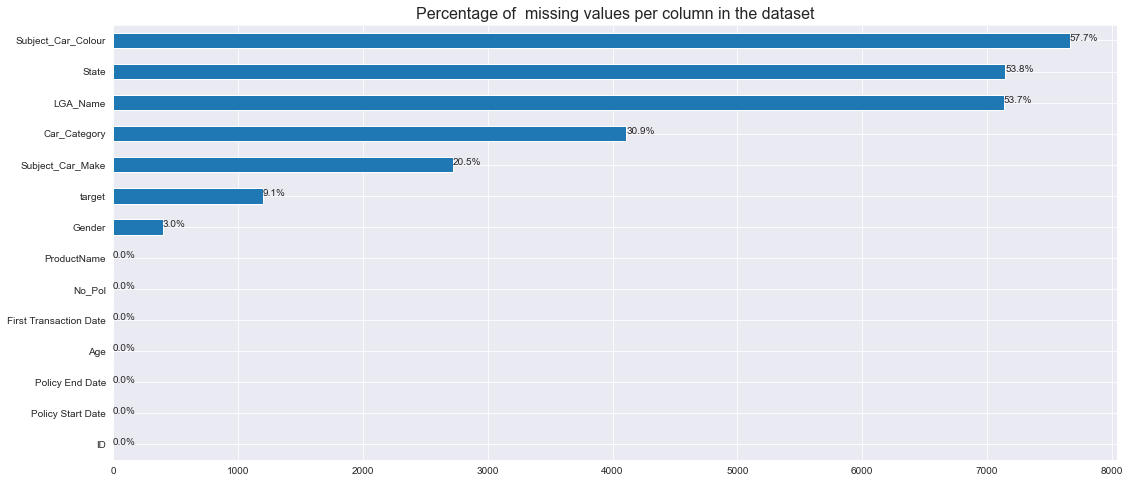

In [14]:
plot_missing(all_data )

In [15]:
#identify all column types 

date_cols = [col for col in all_data.columns if 'Date' in col]
num_cols = ['Age' , 'No_Pol']
cat_cols = [cols for cols in all_data.columns if cols not in date_cols+num_cols+['ID']]

for col in all_data.columns:
  if col in date_cols:
    all_data[col] = pd.to_datetime(all_data[col])
  elif col in cat_cols:
    all_data[col] = all_data[col].astype('category')

In [16]:
date_cols , num_cols , cat_cols

(['Policy Start Date', 'Policy End Date', 'First Transaction Date'],
 ['Age', 'No_Pol'],
 ['Gender',
  'Car_Category',
  'Subject_Car_Colour',
  'Subject_Car_Make',
  'LGA_Name',
  'State',
  'ProductName',
  'target'])

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13281 non-null  object        
 1   Policy Start Date       13281 non-null  datetime64[ns]
 2   Policy End Date         13281 non-null  datetime64[ns]
 3   Gender                  12881 non-null  category      
 4   Age                     13281 non-null  int64         
 5   First Transaction Date  13281 non-null  datetime64[ns]
 6   No_Pol                  13281 non-null  int64         
 7   Car_Category            9171 non-null   category      
 8   Subject_Car_Colour      5622 non-null   category      
 9   Subject_Car_Make        10557 non-null  category      
 10  LGA_Name                6149 non-null   category      
 11  State                   6137 non-null   category      
 12  ProductName             13281 non-null  catego

In [18]:
for each_cols in all_data.columns:
    print(all_data.loc[:,each_cols].value_counts())
    print('-'*50)

ID_IUKC6E8    1
ID_QQF2MCI    1
ID_HQP566N    1
ID_XEI5HIP    1
ID_P8LHZVW    1
             ..
ID_PKD7N0M    1
ID_94MZ8I4    1
ID_WT0C9OS    1
ID_0785NAL    1
ID_9XWF0KV    1
Name: ID, Length: 13281, dtype: int64
--------------------------------------------------
2010-03-27    97
2010-12-23    86
2010-07-05    84
2010-02-26    80
2010-04-17    75
              ..
2010-06-09     1
2003-04-13     1
2006-03-24     1
2009-08-29     1
2005-08-05     1
Name: Policy Start Date, Length: 376, dtype: int64
--------------------------------------------------
2010-12-31    177
2011-03-26    105
2011-02-25     81
2011-01-15     80
2011-02-27     78
             ... 
2012-01-20      1
2016-06-25      1
2016-09-06      1
2037-08-03      1
2034-05-20      1
Name: Policy End Date, Length: 372, dtype: int64
--------------------------------------------------
Male            8356
Female          3679
Entity           300
Joint Gender     238
NOT STATED       190
NO GENDER         76
SEX               42
N

In [19]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0


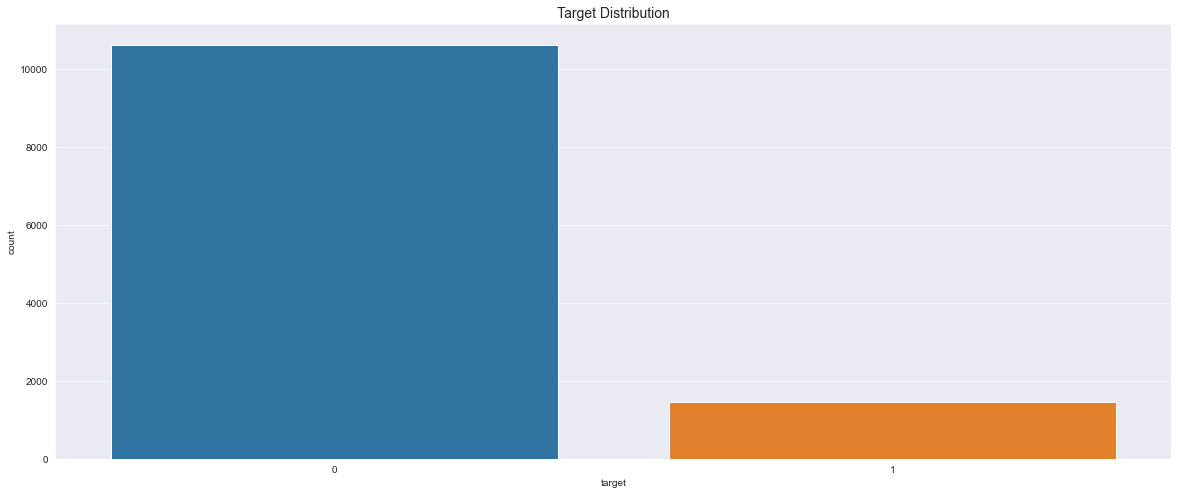

In [20]:
sns.countplot(target)
plt.title('Target Distribution', fontdict={'size':14});

Looking at this ditribution , we can see that our dataset contains highly imbalanced data and this need to be taken care of accordingly

Lets look into filling the empty data and doing some feature engineering on some or all of the columns

## Filling in the missing values of the features in the combined datasets

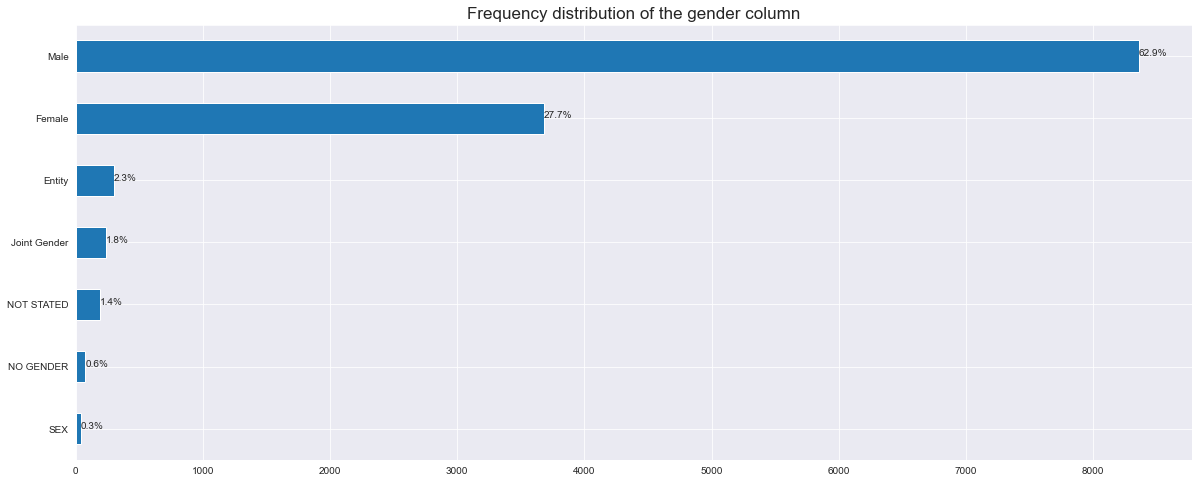

In [21]:
#Gender column

ax = all_data.Gender.value_counts().sort_values().plot(kind='barh');
plt.title('Frequency distribution of the gender column' , fontdict={'size':17})
for p in ax.patches:
    percentage = '{:.1f}%'.format((p.get_width()/len(all_data.Gender))*100)
    width , height = p.get_width() , p.get_height()
    x = p.get_x()+width+0.02
    y = p.get_y()+height/2
    ax.annotate(percentage , (x,y))

In [22]:
all_data.Gender.unique()

[Male, Female, Entity, Joint Gender, NaN, NO GENDER, NOT STATED, SEX]
Categories (7, object): [Male, Female, Entity, Joint Gender, NO GENDER, NOT STATED, SEX]

In [23]:
## Mapping the less significant entries as `Others` 🤣
 
mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}

all_data.Gender.replace(mapper , inplace=True)

In [24]:
all_data.Gender.value_counts()

Male      8356
Female    3679
Other      846
Name: Gender, dtype: int64

In [25]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13281 non-null  object        
 1   Policy Start Date       13281 non-null  datetime64[ns]
 2   Policy End Date         13281 non-null  datetime64[ns]
 3   Gender                  12881 non-null  object        
 4   Age                     13281 non-null  int64         
 5   First Transaction Date  13281 non-null  datetime64[ns]
 6   No_Pol                  13281 non-null  int64         
 7   Car_Category            9171 non-null   category      
 8   Subject_Car_Colour      5622 non-null   category      
 9   Subject_Car_Make        10557 non-null  category      
 10  LGA_Name                6149 non-null   category      
 11  State                   6137 non-null   category      
 12  ProductName             13281 non-null  catego

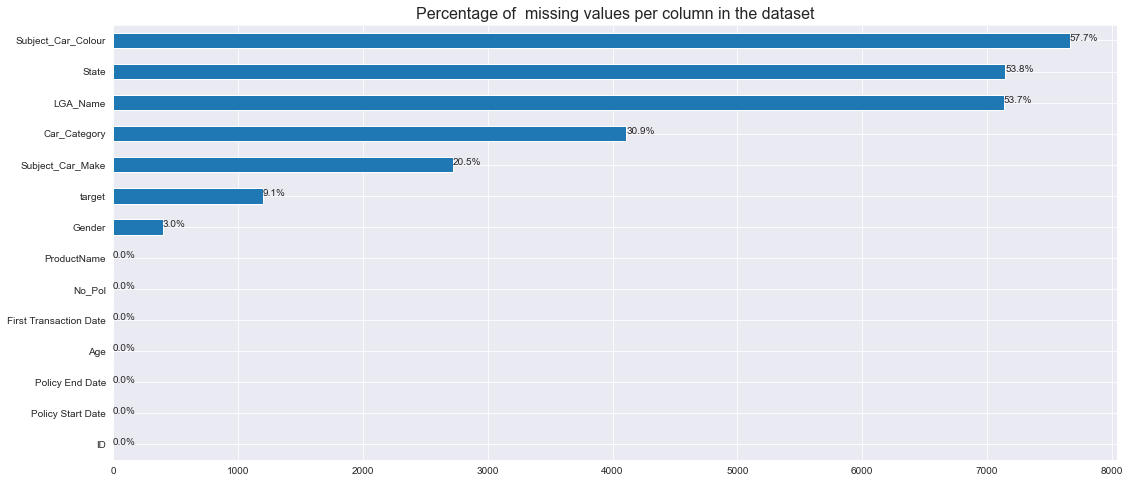

In [26]:
plot_missing(all_data)

# Filling in missing values

In [27]:
cat_cols

['Gender',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName',
 'target']

In [28]:
#checking the percentage of the missing values in the gender column on the entire dataset
print('The percentage of missing values in the gender column is {:.2f}%'.format((all_data.Gender.isna().sum()/len(all_data))*100))

The percentage of missing values in the gender column is 3.01%


In [29]:
all_data.loc[: , cat_cols]

,Gender,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,Male,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,Female,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,Male,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,Male,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,Other,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0
...,...,...,...,...,...,...,...,...
13276,Male,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,NaN
13277,Male,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic,NaN
13278,Male,Truck,White,Iveco,Victoria Island,Lagos,CVTP,NaN
13279,Male,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic,NaN


In [30]:
#filling the missing gender with the mode as it contains only 3% of the whole gender entries

all_data['Gender'].fillna(all_data['Gender'].mode()[0] , inplace=True)

In [31]:
#checking to see which columns got missing vlaues

miss_cols = []
for each_cols in all_data.columns:
    if all_data[each_cols].isna().sum():
        miss_cols.append(each_cols)
        
miss_cols

['Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'target']

In [32]:
#all missing values count for the other missing columns which range in thousands
for miss in miss_cols[:-1]:
    print(f"{miss} --> {all_data[miss].isna().sum()} missing values.")

Car_Category --> 4110 missing values.
Subject_Car_Colour --> 7659 missing values.
Subject_Car_Make --> 2724 missing values.
LGA_Name --> 7132 missing values.
State --> 7144 missing values.


In [33]:
all_data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [34]:
#Filling in the missing values of the missing columns with random values  of the dstribution and creating
#additional column to track missing values 

for each_miss_cols in miss_cols[:-1]:
    all_data[each_miss_cols + '_missing'] = pd.isnull(all_data[each_miss_cols])*1
    
    random_samples = all_data[each_miss_cols].dropna().sample(all_data[each_miss_cols].isna().sum() , random_state=42 , replace=True)
    random_samples.index = all_data[all_data[each_miss_cols].isna()].index
    all_data.loc[all_data[each_miss_cols].isna() , each_miss_cols] = random_samples
#     all_data[each_miss_cols].fillna(all_data[each_miss_cols].mode()[0] , inplace=True)


In [35]:
#dropping the id column as it seems to provide little or no useful info
all_data.drop('ID' , axis=1 , inplace=True)

## Exploratory Data Analysis and Feature Engineering and Transformations

In [36]:
#Creating a policy duration column from the policyn start and end dates
all_data['Policy_Duration'] = (all_data['Policy End Date'] - all_data['Policy Start Date']).dt.days

In [37]:
#dropping any column with features that are duplicated
all_data = all_data.T.drop_duplicates().T

In [38]:
#remove the duplicate column(S) from the list of columns
for cols in date_cols:
    if cols not in all_data.columns:
        date_cols.remove(cols)

date_cols

['Policy Start Date', 'Policy End Date']

In [39]:
#creating more columns from the date features

for each in date_cols:
    for feature in ['year' , 'month' , 'dayofweek' , 'day']:
        all_data[each+feature] = getattr(all_data[each].dt , feature)
    
    all_data.drop(each , axis=1 , inplace=True)

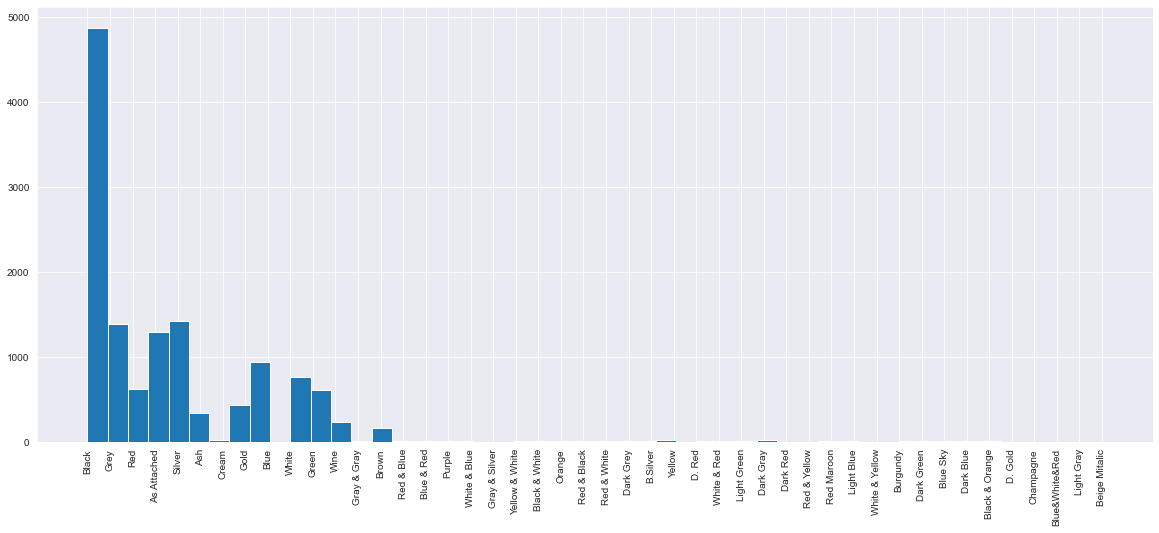

In [40]:
all_data['Subject_Car_Colour'].hist(bins=50)
plt.xticks(rotation=90);

In [41]:
#grouping the less frequent subject car colour into other colours
for cols in all_data['Subject_Car_Colour'].unique():
    if len(all_data[all_data['Subject_Car_Colour'] == cols]) < 100 :
        mapper = {cols : 'Other Colours'}
        all_data['Subject_Car_Colour'].replace(mapper , inplace=True)
        
        
all_data["Subject_Car_Colour"].value_counts()

Black            4879
Silver           1426
Grey             1381
As Attached      1294
Blue              934
White             758
Red               623
Green             608
Gold              429
Ash               342
Wine              234
Other Colours     217
Brown             156
Name: Subject_Car_Colour, dtype: int64

In [42]:
#grouping the less frequent car_category into `other cars`
for cols in all_data['Car_Category'].unique():
    if len(all_data[all_data['Car_Category'] == cols]) < 100:
        mapper = {cols : 'Other Cars'}
        all_data['Car_Category'].replace(mapper , inplace=True)
        
all_data['Car_Category'].value_counts()

Saloon        9577
JEEP          3264
Other Cars     291
Truck          149
Name: Car_Category, dtype: int64

In [43]:
all_data['Subject_Car_Make'].value_counts().head(14)

TOYOTA         6883
Honda          1423
Lexus           810
Mercedes        739
Hyundai         627
Kia             489
Ford            382
Nissan          342
Volkswagen      174
Iveco           167
Range Rover     150
Mitsubishi      124
BMW              88
Land Rover       82
Name: Subject_Car_Make, dtype: int64

In [44]:
for cols in all_data['Subject_Car_Make'].unique():
    col_len = len(all_data[all_data['Subject_Car_Make'] == cols])
    if col_len < 500:
        mapper = {cols : 'Other Car Make'}
        all_data['Subject_Car_Make'].replace(mapper , inplace=True)
        
all_data['Subject_Car_Make'].value_counts()

TOYOTA            6883
Other Car Make    2799
Honda             1423
Lexus              810
Mercedes           739
Hyundai            627
Name: Subject_Car_Make, dtype: int64

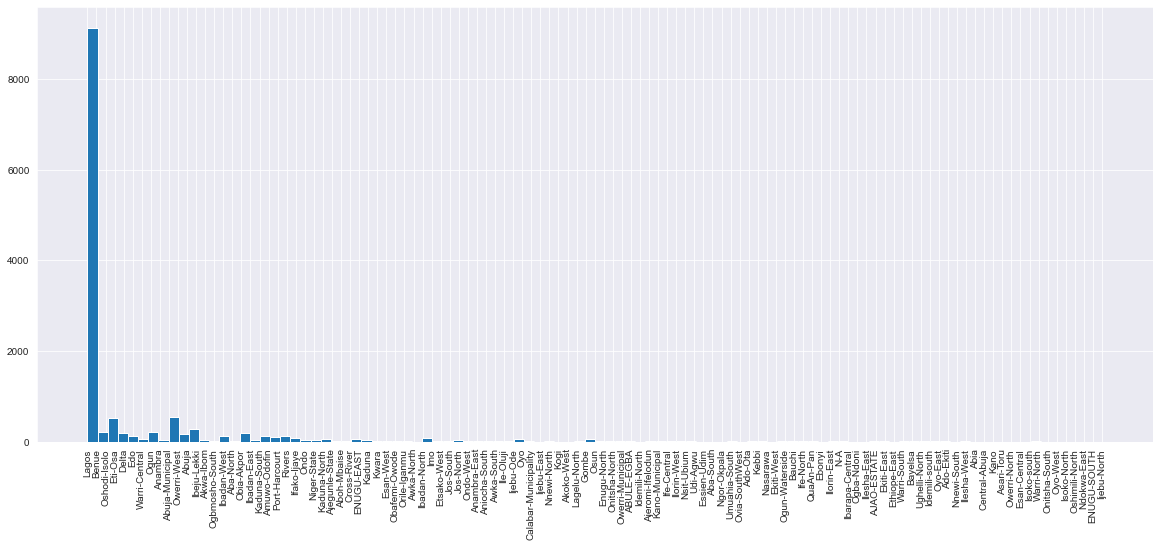

In [45]:
all_data['State'].hist(bins=100)
plt.xticks(rotation=90);

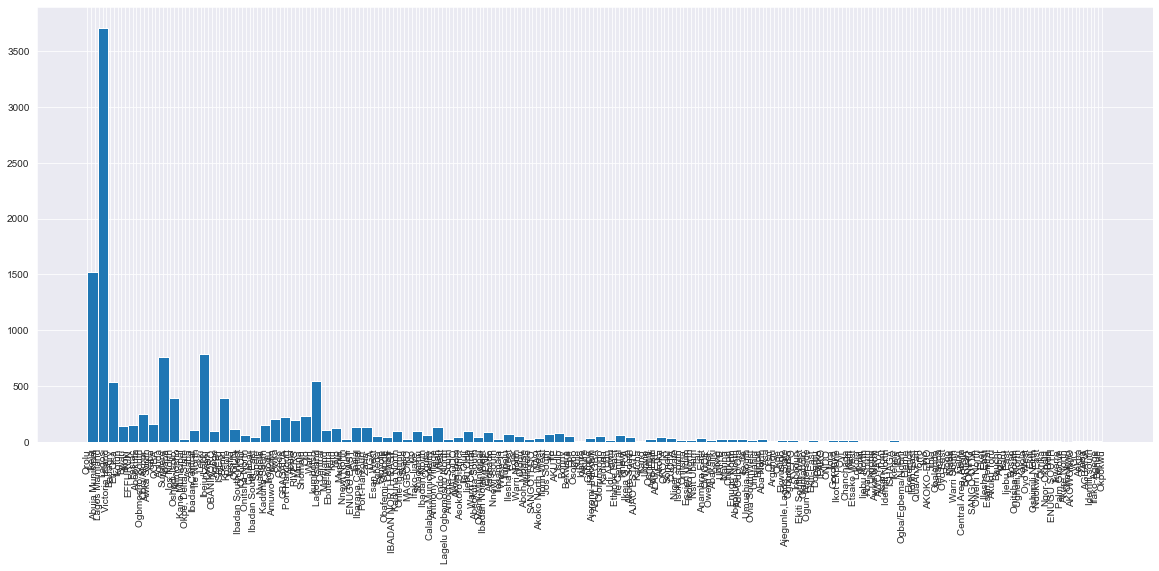

In [46]:
all_data['LGA_Name'].hist(bins=100)
plt.xticks(rotation=90);

In [47]:
for each in all_data['State'].unique():
    if len(all_data[all_data['State'] == each])< 200:
        mapper = {each : 'Other States'}
        all_data['State'].replace(mapper ,inplace=True)

In [48]:
for each in all_data['LGA_Name'].unique():
    if len(all_data[all_data['LGA_Name'] ==each]) < 200:
        mapper = {each :'Other LGA'}
        all_data['LGA_Name'].replace(mapper , inplace=True)

In [49]:
all_data.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Car_Category_missing,Subject_Car_Colour_missing,Subject_Car_Make_missing,LGA_Name_missing,State_missing,Policy_Duration,Policy Start Dateyear,Policy Start Datemonth,Policy Start Datedayofweek,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Datedayofweek,Policy End Dateday
0,Male,30,1,Saloon,Black,TOYOTA,Other LGA,Lagos,Car Classic,0,0,0,0,1,1,364,2010,5,4,14,2011,5,4,13
1,Female,79,1,JEEP,Grey,TOYOTA,Ikeja,Benue,Car Classic,1,0,0,0,1,1,364,2010,11,0,29,2011,11,0,28
2,Male,43,1,Saloon,Red,TOYOTA,Abuja Municipal,Lagos,Car Classic,0,0,0,0,1,1,364,2010,3,6,21,2011,3,6,20
3,Male,2,1,Saloon,As Attached,TOYOTA,Lagos Mainland,Lagos,CarSafe,0,1,1,1,1,1,364,2010,8,5,21,2011,8,5,20
4,Other,20,3,JEEP,Black,TOYOTA,Lagos,Lagos,Muuve,1,1,1,1,0,0,124,2010,8,6,29,2010,12,4,31


In [50]:
### Quantizing the age column to create the age group feature
#removing the outlier on the age column

#ideally its only logical that the required age to own a vehicle and be able to claim an issurance is 18 years old 
#no one literally goes after insurance claims aged above 90
all_data['Age'] = pd.Series([18 if x < 18 else 90 if x > 90 else x for x in all_data['Age'] ])

quantiles = [0 , .25 , .5 , .75 , 1  ]
quantile_labels = [1,2,3,4]
all_data['Age_group'] = pd.qcut(all_data['Age'] , q=quantiles , labels=quantile_labels)

In [51]:
all_data['Age_group'].head()

0    1
1    4
2    3
3    1
4    1
Name: Age_group, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Gender                      13281 non-null  object  
 1   Age                         13281 non-null  int64   
 2   No_Pol                      13281 non-null  object  
 3   Car_Category                13281 non-null  object  
 4   Subject_Car_Colour          13281 non-null  object  
 5   Subject_Car_Make            13281 non-null  object  
 6   LGA_Name                    13281 non-null  object  
 7   State                       13281 non-null  object  
 8   ProductName                 13281 non-null  object  
 9   target                      12079 non-null  object  
 10  Car_Category_missing        13281 non-null  object  
 11  Subject_Car_Colour_missing  13281 non-null  object  
 12  Subject_Car_Make_missing    13281 non-null  object  
 13  LGA_Name_missing

In [53]:
for cols , content in all_data.items():
    if pd.api.types.is_categorical_dtype(content):
        all_data[cols] = all_data[cols].astype('object')

all_data['Age_group']=all_data['Age_group'].astype('int64')

In [54]:

all_data.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Car_Category_missing,Subject_Car_Colour_missing,Subject_Car_Make_missing,LGA_Name_missing,State_missing,Policy_Duration,Policy Start Dateyear,Policy Start Datemonth,Policy Start Datedayofweek,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Datedayofweek,Policy End Dateday,Age_group
0,Male,30,1,Saloon,Black,TOYOTA,Other LGA,Lagos,Car Classic,0,0,0,0,1,1,364,2010,5,4,14,2011,5,4,13,1
1,Female,79,1,JEEP,Grey,TOYOTA,Ikeja,Benue,Car Classic,1,0,0,0,1,1,364,2010,11,0,29,2011,11,0,28,4
2,Male,43,1,Saloon,Red,TOYOTA,Abuja Municipal,Lagos,Car Classic,0,0,0,0,1,1,364,2010,3,6,21,2011,3,6,20,3
3,Male,18,1,Saloon,As Attached,TOYOTA,Lagos Mainland,Lagos,CarSafe,0,1,1,1,1,1,364,2010,8,5,21,2011,8,5,20,1
4,Other,20,3,JEEP,Black,TOYOTA,Lagos,Lagos,Muuve,1,1,1,1,0,0,124,2010,8,6,29,2010,12,4,31,1


In [55]:
for each in ['No_Pol' , 'Policy_Duration' , 'Age_group']:
    all_data[each] = all_data[each].astype('int64')

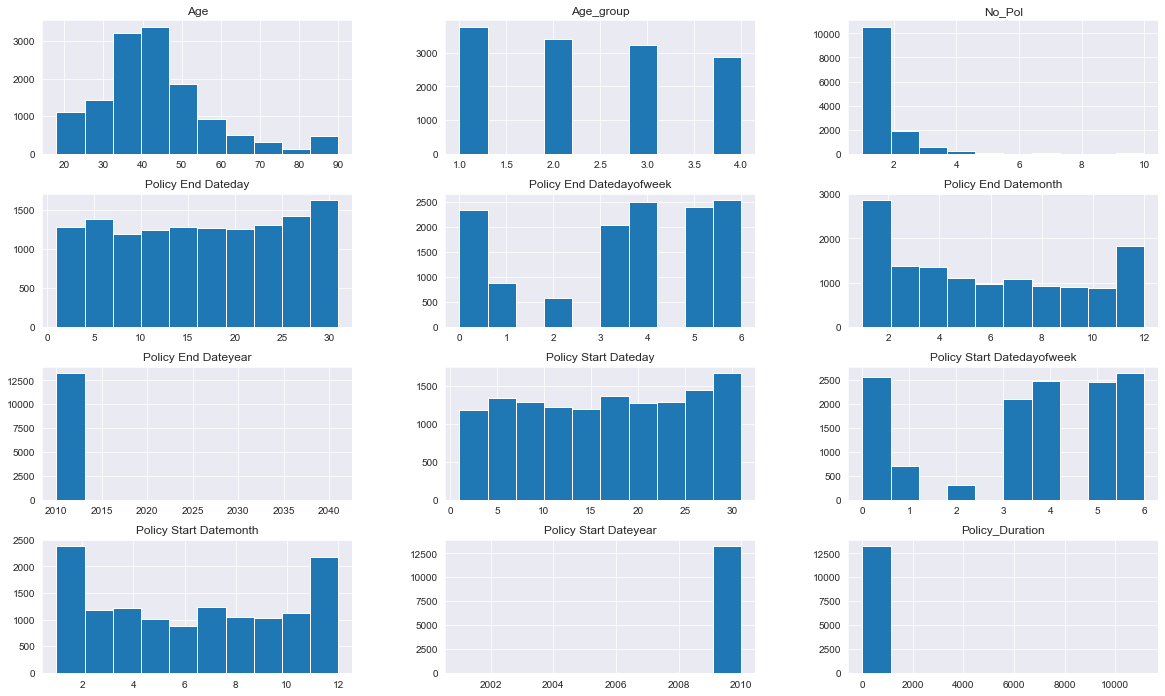

In [56]:
all_data.hist(figsize=(20,12));

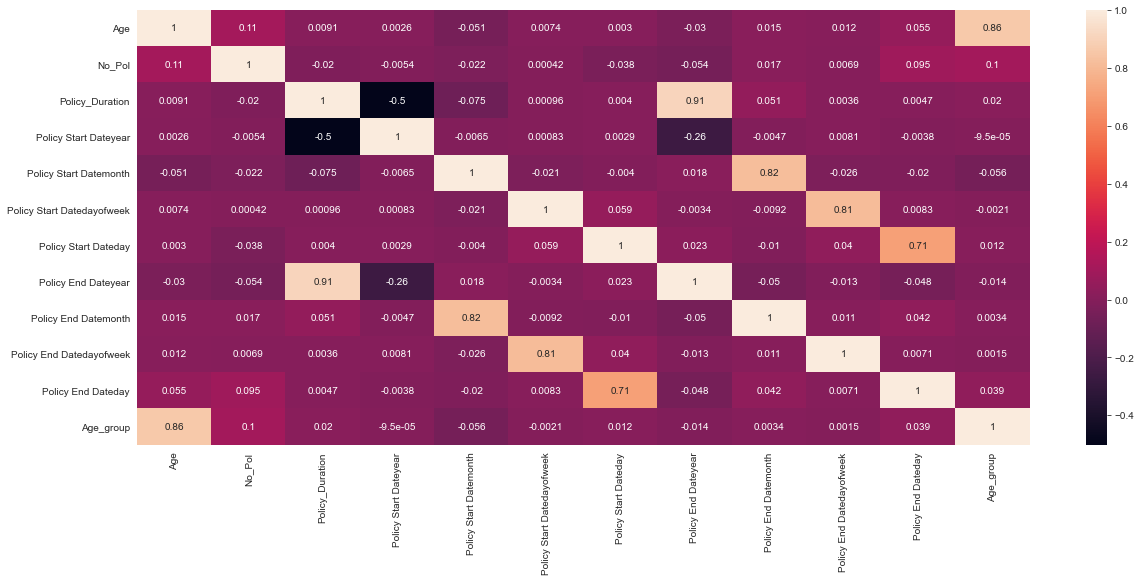

In [57]:
sns.heatmap(all_data.corr(), annot=True);

In [58]:
#Creating features constitiuting quotients of high correlated columns

all_data['age_on_agegroup'] = (all_data['Age']/all_data['Age_group']).astype(int)
all_data['Duration_on_endyear'] = (all_data['Policy_Duration'] / all_data['Policy End Dateyear']).astype(int)

In [78]:
all_data_copied = all_data.copy()

In [79]:
all_data_copied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      13281 non-null  object
 1   Age                         13281 non-null  int64 
 2   No_Pol                      13281 non-null  int64 
 3   Car_Category                13281 non-null  object
 4   Subject_Car_Colour          13281 non-null  object
 5   Subject_Car_Make            13281 non-null  object
 6   LGA_Name                    13281 non-null  object
 7   State                       13281 non-null  object
 8   ProductName                 13281 non-null  object
 9   target                      12079 non-null  object
 10  Car_Category_missing        13281 non-null  object
 11  Subject_Car_Colour_missing  13281 non-null  object
 12  Subject_Car_Make_missing    13281 non-null  object
 13  LGA_Name_missing            13281 non-null  ob

## One hot Encoding

In [80]:
all_data_1hot = pd.get_dummies(all_data_copied , drop_first=True)
all_data_1hot.head()

,Age,No_Pol,Policy_Duration,Policy Start Dateyear,Policy Start Datemonth,Policy Start Datedayofweek,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Datedayofweek,Policy End Dateday,Age_group,age_on_agegroup,Duration_on_endyear,Gender_Male,Gender_Other,Car_Category_Other Cars,Car_Category_Saloon,Car_Category_Truck,Subject_Car_Colour_Ash,Subject_Car_Colour_Black,Subject_Car_Colour_Blue,Subject_Car_Colour_Brown,Subject_Car_Colour_Gold,Subject_Car_Colour_Green,Subject_Car_Colour_Grey,Subject_Car_Colour_Other Colours,Subject_Car_Colour_Red,Subject_Car_Colour_Silver,Subject_Car_Colour_White,Subject_Car_Colour_Wine,Subject_Car_Make_Hyundai,Subject_Car_Make_Lexus,Subject_Car_Make_Mercedes,Subject_Car_Make_Other Car Make,Subject_Car_Make_TOYOTA,LGA_Name_Eti-Osa,LGA_Name_Ibeju/Lekki,LGA_Name_Ikeja,LGA_Name_Lagos,LGA_Name_Lagos Island,LGA_Name_Lagos Mainland,LGA_Name_Lekki,LGA_Name_Obia/Akpor,LGA_Name_Oshodi-Isolo,LGA_Name_Other LGA,LGA_Name_Surulere,LGA_Name_Victoria Island,State_Benue,State_Eti-Osa,State_Ibeju-Lekki,State_Lagos,State_Ogun,State_Oshodi-Isolo,State_Other States,ProductName_Car Classic,ProductName_Car Plus,ProductName_Car Vintage,ProductName_CarFlex,ProductName_CarSafe,ProductName_Customized Motor,ProductName_Motor Cycle,ProductName_Muuve,target_1.0,Car_Category_missing_1,Subject_Car_Colour_missing_1,Subject_Car_Make_missing_1,LGA_Name_missing_1,State_missing_1
0,30,1,364,2010,5,4,14,2011,5,4,13,1,30,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,79,1,364,2010,11,0,29,2011,11,0,28,4,19,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
2,43,1,364,2010,3,6,21,2011,3,6,20,3,14,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,18,1,364,2010,8,5,21,2011,8,5,20,1,18,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1
4,20,3,124,2010,8,6,29,2010,12,4,31,1,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0


In [81]:
train_set , test_set = all_data_1hot[:idx_thresh] , all_data_1hot[idx_thresh:]

## Resampling the training set to correct imbalancing

In [82]:
over =  SMOTE(sampling_strategy=.8 , random_state=42)

X_train_res , y_train_res = over.fit_resample(train_set , target)

In [83]:
y_train_res.value_counts()

0    10624
1     8499
Name: target, dtype: int64

#### Normalizing/Standardizing the dataset

In [65]:
scaler = MinMaxScaler()
scaler.fit(X_train_res)
## ststandardizing the resampled training set
X_train_res = scaler.transform(X_train_res)
## standardizing the test_set
X_test_res = scaler.transform(test_set)

In [66]:
scaler = StandardScaler()
scaler.fit(X_train_res)
X_train_res = scaler.transform(X_train_res)
test_set = scaler.transform(test_set)

#### Creating a function that handles fitting , accuracy and f1 score metric evaluations and cross_validations

In [84]:
def evaluate_model(model, model_name , cross_val=False ,fold=5):
    
    model.fit(X_train , y_train)
    print('The accuracy of the {} is {:.2f}'.format(model_name , model.score(X_valid , y_valid)))
    print('The F1 score of the {} is {:.2f}'.format(model_name , f1_score(y_valid , model.predict(X_valid))))
    
    #cross_validation on combined traning data
    if cross_val:
        kfold = KFold(n_splits=fold , shuffle=True , random_state=42)
        scores = cross_val_score(model , X_train_res , y_train_res , cv=kfold , scoring='f1' , verbose=True , n_jobs=-1)
        print('F1 Cross Validation Scores of the {}: {}'.format(model_name , scores))
        print('Mean F1 Score of the {}: {:.2f}'.format(model_name , scores.mean()))

In [85]:
## Splitting training set into train and validation sets
X_train , X_valid , y_train , y_valid = train_test_split(X_train_res , y_train_res , test_size=.2, stratify=y_train_res , random_state=42)

## Logistic Regression Classifier

In [124]:
lr_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs', l1_ratio=.5)
evaluate_model(lr_model , "Logistic Regression" , True , fold=5)

The accuracy of the Logistic Regression is 0.88
The F1 score of the Logistic Regression is 0.87


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


F1 Cross Validation Scores of the Logistic Regression: [0.6733255  0.92374601 0.685331   0.92102138 0.67142857]
Mean F1 Score of the Logistic Regression: 0.77


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


In [89]:
#lets train the classifier on the combined dataset and make predictions on the test set
lr_model.fit(X_train_res , y_train_res)
y_preds = lr_model.predict(test_set)

In [90]:
ss['target'] = y_preds
ss.to_csv('./submissions/sub2.csv' , index=False)

In [72]:
#creating some visualization to observe data
# create_report(all_data_copied)

## K Nearest Neighbbors Classifier

In [127]:

kn_model = KNeighborsClassifier(n_neighbors=2)
evaluate_model(kn_model , 'KNN' , True , fold=5)


The accuracy of the KNN is 0.89
The F1 score of the KNN is 0.88


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


F1 Cross Validation Scores of the KNN: [0.88086222 0.87749783 0.88587896 0.88027562 0.90078557]
Mean F1 Score of the KNN: 0.89
**************************************************


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


In [128]:
ss['target'] = kn_model.predict(test_set)

### submission 3

In [129]:
ss.to_csv('./submissions/sub3.csv' , index=False)

## Naive Bayes Classifier

In [92]:
nb_model = MultinomialNB()
evaluate_model(nb_model , "MultinomialNB" , True , fold=5)

The accuracy of the MultinomialNB is 0.93
The F1 score of the MultinomialNB is 0.93


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


F1 Cross Validation Scores of the MultinomialNB: [0.91927512 0.91815718 0.92841765 0.92388019 0.9259962 ]
Mean F1 Score of the MultinomialNB: 0.92


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


## Stochastic Gradient Classifier

In [93]:
sgd_model = SGDClassifier()
evaluate_model(sgd_model , 'SGD Classifier' , True)

The accuracy of the SGD Classifier is 0.56
The F1 score of the SGD Classifier is 0.00


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


F1 Cross Validation Scores of the SGD Classifier: [0.         0.         0.         0.70749158 0.73509075]
Mean F1 Score of the SGD Classifier: 0.29


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [ ]:
ss['target'] = sgd_model.predict(test_set)
ss.to_csv('./submissions/sub4.csv' , index=False)

## RandomForestClassifier

In [99]:
rf_model = RandomForestClassifier()
evaluate_model(rf_model , 'RandomForest Classifier' , True)

The accuracy of the RandomForest Classifier is 1.00
The F1 score of the RandomForest Classifier is 1.00


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


F1 Cross Validation Scores of the RandomForest Classifier: [1. 1. 1. 1. 1.]
Mean F1 Score of the RandomForest Classifier: 1.00


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


In [100]:
# making submission for the randomforst classifier model
ss['target'] = rf_model.predict(test_set)
ss.to_csv('./submissions/sub5.csv' , index=False)

Decision Tress and its ensembles arent generaliziing well on the test dataset

## Support Vector Machine

In [101]:
sv_model = SVC()
evaluate_model(sv_model , 'SVC Model' , True)

The accuracy of the SVC Model is 0.56
The F1 score of the SVC Model is 0.15


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


F1 Cross Validation Scores of the SVC Model: [0.15547703 0.15653041 0.15964303 0.16008004 0.15880893]
Mean F1 Score of the SVC Model: 0.16


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


In [102]:
ss['target'] = sv_model.predict(test_set)
ss.to_csv('./submissions/sub6.csv' , index=False)

## Gradient Boosted Algorithm

In [105]:
gb_model = GradientBoostingClassifier()
evaluate_model(gb_model , 'GradientBoostingClassifier' , True)

The accuracy of the GradientBoostingClassifier is 1.00
The F1 score of the GradientBoostingClassifier is 1.00


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


F1 Cross Validation Scores of the GradientBoostingClassifier: [1. 1. 1. 1. 1.]
Mean F1 Score of the GradientBoostingClassifier: 1.00


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.4s finished


All tree algorithms appears to be doing poorly on the dataset

## HyperParameter Tunning

In [109]:
##Logisitic Regression
param_grid = [
    {
        'C' : np.arange(0 , 100 , 10),
        'solver': ['lbfgs'],
        'penalty':['l1', 'l2'],
        'max_iter': np.arange(0,100,20)
    },
    {
        'C':np.arange(0,100, 10),
        'solver': ['liblinear'],
        'penalty':['l2']
    },
    {
        'C':np.arange(0,100, 10),
        'solver': ['saga'],
        'penalty':['elasticnet']
    }
]

In [110]:
gs_lr_model = GridSearchCV(lr_model , param_grid , cv=5 , scoring='f1' , verbose=True )

In [111]:
gs_lr_model.fit(X_train_res , y_train_res)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
                          'max_iter': array([ 0, 20, 40, 60, 80]),
                          'penalty': ['l1', 'l2'], 'solver': ['lbfgs']},
                         {'C': array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
                          'penalty': ['l2'], 'solver': ['liblinear']},
                         {'C': array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='f1', verbose=True)

In [112]:
evaluate_model(gs_lr_model , 'Tuned LR Model' , True)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
The accuracy of the Tuned LR Model is 1.00
The F1 score of the Tuned LR Model is 1.00


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


F1 Cross Validation Scores of the Tuned LR Model: [1. 1. 1. 1. 1.]
Mean F1 Score of the Tuned LR Model: 1.00


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


In [113]:
gs_lr_model.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [130]:
ss['target'] = gs_lr_model.predict(test_set)
ss.to_csv('./submissions/sub2.csv' , index=False)